In [1]:
%matplotlib inline
# Switch to ''%matplotlib ipympl' for interactive plots
import warnings
import imp
import pickle
import lmfit
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

# Styling
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [2]:
# Initialise wrapper and test datasets
wrapper_fpath = (r"..\mobius.py")
wr = imp.load_source('mobius', wrapper_fpath)
wr.initialize('..\..\Applications\Persist\persist.dll')

# Calibration functions
calib_fpath = (r"..\mobius_calib_uncert_lmfit.py")
cu = imp.load_source('mobius_calib_uncert_lmfit', calib_fpath)

In [3]:
#dataset = wr.DataSet.setup_from_parameter_and_input_files('..\..\Applications\IncaC\Boyne\persist_params_Boyne.dat', '..\..\Applications\IncaC\Boyne\incac_inputs_Boyne.dat')
dataset = wr.DataSet.setup_from_parameter_and_input_files('..\..\Applications\Persist\Tarland\persist_params_Tarland.dat', '..\..\Applications\Persist\Tarland\persist_inputs_Tarland.dat')

In [4]:
comparisons = [
    ('Reach flow', ['Coull'], 'observed Q', [])
]

In [7]:
index_short_name = {'All':'A', 'Quick':'q', 'Soilwater':'s', 'Groundwater':'g', 'Coull':'r'}

param_df = cu.get_double_parameters_as_dataframe(dataset, index_short_name=index_short_name)
pd.options.display.max_rows = 999
param_df

,name,short_name,unit,index,min_value,initial_value,max_value
0,Solver resolution,,dimensionless,(),0.001000,0.10,0.5
1,Snow multiplier,Msnow_A,dimensionless,"(All,)",0.500000,1.00,1.5
2,Snow melt temperature,Tsnow_A,°C,"(All,)",-4.000000,0.00,4.0
3,Degree day melt factor,DDFmelt_A,mm/°C/day,"(All,)",1.000000,3.00,4.0
4,Rain multiplier,Mrain_A,dimensionless,"(All,)",0.500000,1.00,1.5
5,Initial snow depth,,mm SWE,"(All,)",0.000000,0.00,9999.0
6,Degree day evapotranspiration,DDET_A,mm/°C/day,"(All,)",0.050000,0.20,0.2
7,Growing degree threshold,Tgrow_A,°C,"(All,)",-4.000000,-1.00,4.0
8,Canopy interception,,mm/day,"(All,)",0.000000,0.00,0.3
9,Initial water depth,,mm,"(Quick, All)",0.000000,0.00,9999.0



Goodness of fit for Reach flow [Coull] vs observed Q []:
Mean error (bias): -0.018559
Mean absolute error: 0.172018
Root mean square error: 0.260749
Nash-Sutcliffe coefficient: 0.803928
Number of observations: 1811



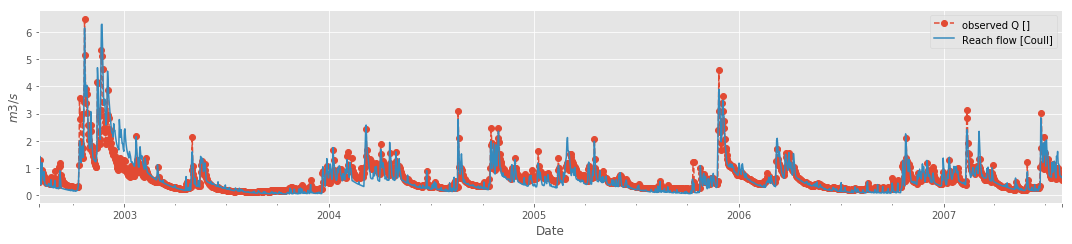

In [14]:
dataset.run_model()
cu.print_goodness_of_fit(dataset, comparisons)
cu.plot_objective(dataset, comparisons)

In [9]:
wanted_names = [
    'Msnow', 'Tsnow', 'DDFmelt', 'DDET', 'Tc_s', 'Tc_g', 'perc_A_s_s', 'perc_A_s_g',
]

calib_df = param_df[[any([sn.startswith(n) for n in wanted_names]) for sn in param_df['short_name']]].reset_index(drop=True)
calib_df

,name,short_name,unit,index,min_value,initial_value,max_value
0,Snow multiplier,Msnow_A,dimensionless,"(All,)",0.50,1.00,1.5
1,Snow melt temperature,Tsnow_A,°C,"(All,)",-4.00,0.00,4.0
2,Degree day melt factor,DDFmelt_A,mm/°C/day,"(All,)",1.00,3.00,4.0
3,Degree day evapotranspiration,DDET_A,mm/°C/day,"(All,)",0.05,0.20,0.2
4,Time constant,Tc_s_A,days,"(Soilwater, All)",1.00,3.00,9999.0
5,Time constant,Tc_g_A,days,"(Groundwater, All)",1.00,40.00,9999.0
6,Percolation matrix,perc_A_s_s,dimensionless,"(All, Soilwater, Soilwater)",0.00,0.35,1.0
7,Percolation matrix,perc_A_s_g,dimensionless,"(All, Soilwater, Groundwater)",0.00,0.65,1.0


In [14]:
params = cu.parameter_df_to_lmfit(calib_df)

params['perc_A_s_g'].set(expr = '1.0-perc_A_s_s')
params['Tc_s_A'].min = 1.0
params['Tc_s_A'].max = 10.0
params['Tc_g_A'].min = 30.0
params['Tc_g_A'].max = 200.0

params

         Consider setting (min < value < max) instead?


name,value,initial value,min,max,vary,expression
Msnow_A,1.00000000,1.0,0.50000000,1.50000000,True,
Tsnow_A,0.00000000,0.0,-4.00000000,4.00000000,True,
DDFmelt_A,3.00000000,3.0,1.00000000,4.00000000,True,
DDET_A,0.20000000,0.2,0.05000000,0.20000000,True,
Tc_s_A,3.00000000,3.0,1.00000000,10.0000000,True,
Tc_g_A,40.0000000,40.0,30.0000000,200.000000,True,
perc_A_s_s,0.35000000,0.35000000000000003,0.00000000,1.00000000,True,
perc_A_s_g,0.65000000,0.65,0.00000000,1.00000000,False,1.0-perc_A_s_s


In [15]:
%%time
mi, res = cu.minimize_residuals(params, dataset, comparisons, method='nelder', norm=False, skip_timesteps=365)
print('Optimization results\n')
lmfit.report_fit(res)
print('\n\nOptimized parameter values:\n')
res.params.pretty_print(precision=3)

cu.set_parameter_values(res.params, dataset)
dataset.write_parameters_to_file('optimized_params.dat')

Optimization results

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 320
    # data points      = 1446
    # variables        = 7
    chi-square         = 47.1149047
    reduced chi-square = 0.03274142
    Akaike info crit   = -4937.05629
    Bayesian info crit = -4900.12039
##  Warning: uncertainties could not be estimated:
[[Variables]]
    Msnow_A:     0.99902006 +/-        nan (nan%) (init = 1)
    Tsnow_A:     0.00639394 +/-        nan (nan%) (init = 0)
    DDFmelt_A:   2.97139733 +/-        nan (nan%) (init = 3)
    DDET_A:      0.18074500 +/- 0.00136804 (0.76%) (init = 0.2)
    Tc_s_A:      3.77377764 +/- 0.19698611 (5.22%) (init = 3)
    Tc_g_A:      53.0725193 +/- 2.28906974 (4.31%) (init = 40)
    perc_A_s_s:  0.29192640 +/- 0.01075501 (3.68%) (init = 0.35)
    perc_A_s_g:  0.70807360 +/- 0.00000000 (0.00%) == '1.0-perc_A_s_s'
[[Correlations]] (unreported correlations are < 0.100)
    C(Tc_s_A, perc_A_s_s) =  0.865
    C(Tc_s_A, Tc_g_A)     =


Goodness of fit for Reach flow [Coull] vs observed Q []:
Mean error (bias): 0.024106
Mean absolute error: 0.161675
Root mean square error: 0.256962
Nash-Sutcliffe coefficient: 0.809582
Number of observations: 1811



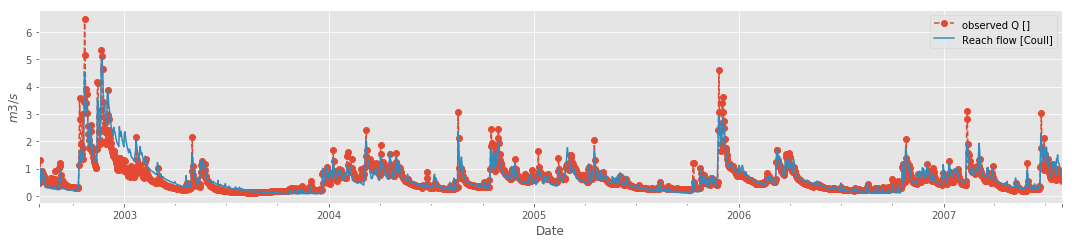

In [16]:
dataset.run_model()
cu.print_goodness_of_fit(dataset, comparisons)
cu.plot_objective(dataset, comparisons)

In [11]:
res.params.add('err_q', value = 0.5, min = 0.05, max = 3)

error_param_dict = {'Observed flow': 'err_q'}

res.params

name,value,standard error,relative error,initial value,min,max,vary,expression
T_melt,0.01071539,1.80724776,16865.91%,0.0,-4.00000000,4.00000000,True,
DDfmelt,3.30486059,2.62066625,79.30%,3.0,1.00000000,4.00000000,True,
DDfet,0.14282074,9.4269e-04,0.66%,0.2,0.05000000,0.20000000,True,
T_s,2.56372982,0.09814635,3.83%,3.0,1.00000000,3.00000000,True,
T_g,30.1403190,0.24836158,0.82%,40.0,30.0000000,200.000000,True,
a,0.01919993,0.00100223,5.22%,0.08000000000000002,1.0000e-03,1.00000000,True,
b,0.49984611,0.00153563,0.31%,0.32000000000000006,0.30000000,0.50000000,True,
inf_e,0.00147650,0.00178933,121.19%,0.0,0.00000000,1.00000000,True,
inf,0.99852350,0.00178934,0.18%,1.0,0.00000000,1.00000000,False,1.0-inf_e
runoff,0.49709623,0.01129702,2.27%,0.5,0.00000000,1.00000000,True,


In [36]:
nworkers = 8
ntemps   = 1
nsteps   = 10000
nwalk    = 100
nburn    = 1000
thin     = 1
init_chains = 'uniform'
skip_timesteps = 365
result_path = r'pickled\\mcmc_results.pkl'
chain_plot_path = r'plots\\chains.png'
corner_plot_path = r'plots\\corner.png'

settings_dict = {'params':res.params,
                 'error_param_dict':error_param_dict,
                 'comparisons':comparisons,
                 'skip_timesteps':skip_timesteps,
                 'nworkers':nworkers,
                 'ntemps':ntemps,
                 'nsteps':nsteps,
                 'nwalk':nwalk,
                 'nburn':nburn,
                 'thin':thin,
                 'init_chains':init_chains,
                 'result_path':result_path,
                 'chain_path':chain_plot_path,
                 'corner_path':corner_plot_path,                 
                }

with open('pickled\\mcmc_settings.pkl', 'wb') as handle:
    pickle.dump(settings_dict, handle)

Time elapsed running emcee: 623.17 minutes.

Quantiles:
[(0.025, 3.0103408543264574), (0.5, 3.1619269168660855), (0.975, 3.543330228760169)]
Quantiles:
[(0.025, 2.3952190904317097), (0.5, 2.646067345555279), (0.975, 3.9805028820371153)]
Quantiles:
[(0.025, 0.10968681351894936), (0.5, 0.15775328962609286), (0.975, 0.16847493043694667)]
Quantiles:
[(0.025, 1.8656045733072935), (0.5, 1.97594076038648), (0.975, 1.9996082455497723)]


Quantiles:
[(0.025, 30.019139090270937), (0.5, 66.92754038654323), (0.975, 199.9763097736693)]


Quantiles:
[(0.025, 0.01401871486134453), (0.5, 0.014710140034783777), (0.975, 0.8729029082190347)]


Quantiles:
[(0.025, 0.20000908311171162), (0.5, 0.788382509392889), (0.975, 0.8050560734924249)]


Quantiles:
[(0.025, 0.36597345182264407), (0.5, 0.3771770679175956), (0.975, 0.56572215769035)]



Best sample (max log likelihood):

Goodness of fit for Reach flow [Outlet] vs Observed discharge outlet []:
Mean error (bias): 0.754625
Mean absolute error: 3.710941
Root mean square error: 6.966710
Nash-Sutcliffe coefficient: 0.790243
Number of observations: 3192



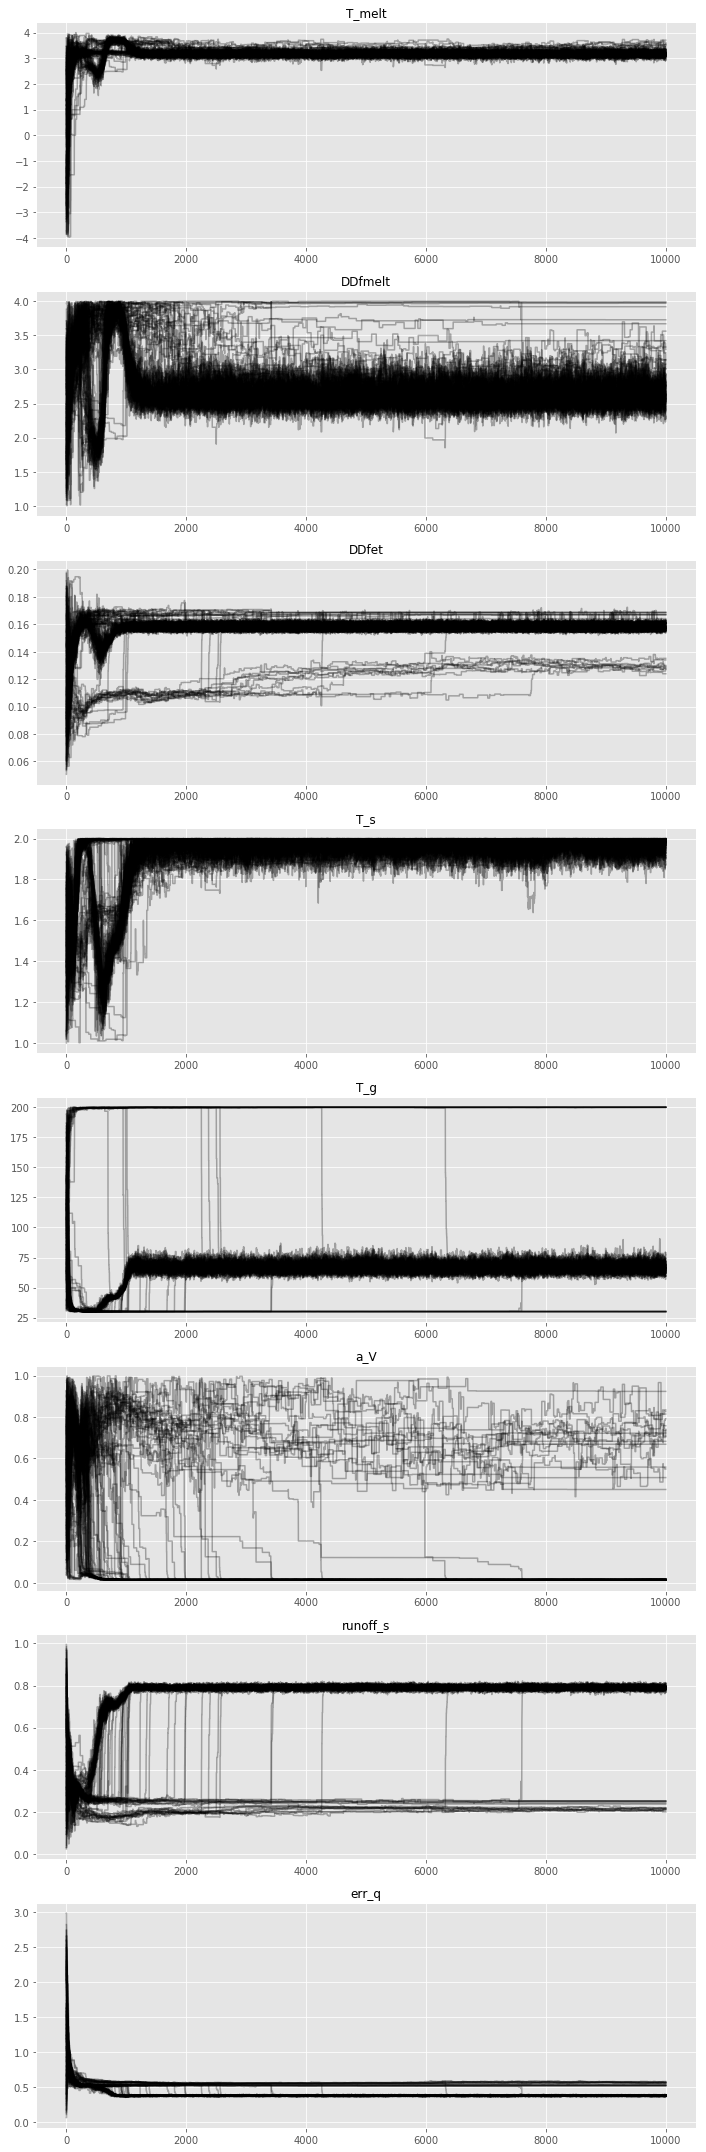

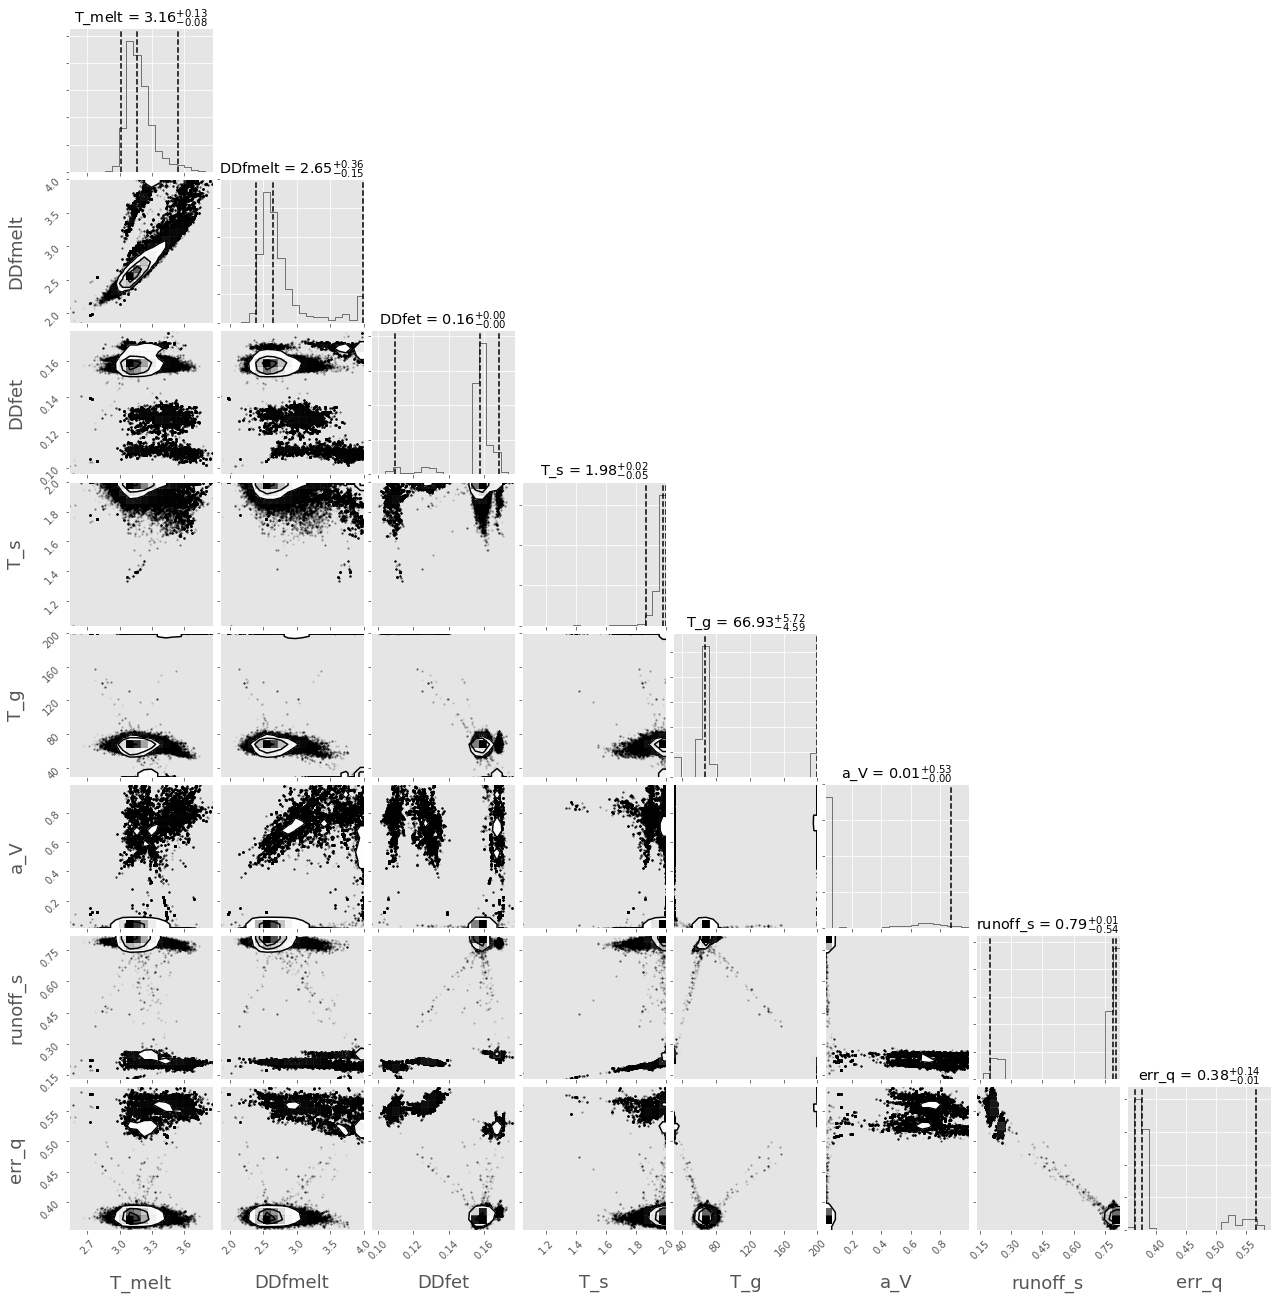

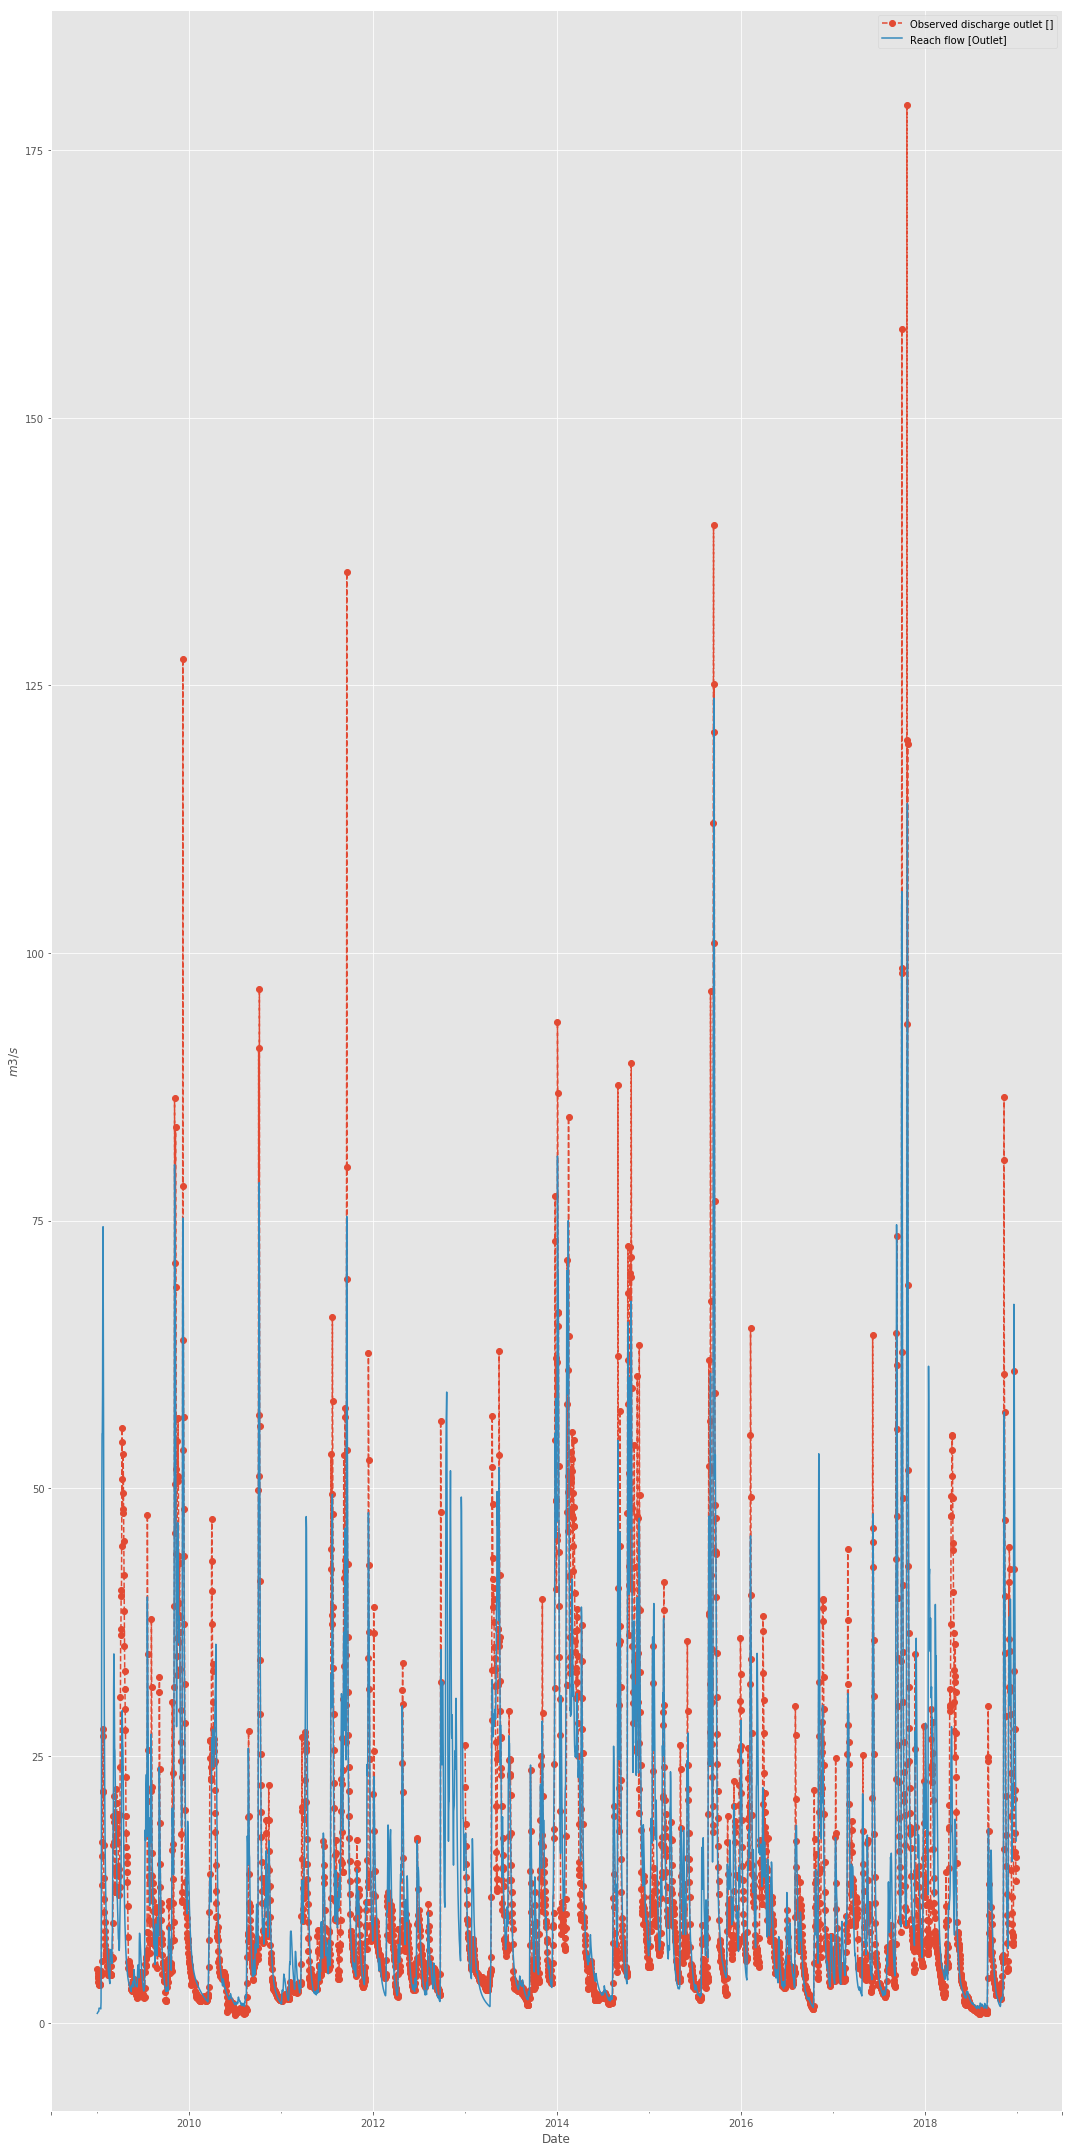

In [37]:
%run -i persist_calib_uncert.py

In [38]:
with open('pickled\\mcmc_results.pkl', 'rb') as handle:
    result = pickle.load(handle)
    
cu.set_parameter_values(result.params, dataset)
dataset.run_model()

dataset.write_parameters_to_file('mcmc_map_params.dat')

In [18]:
highest_prob = np.argmax(result.lnprob)
hp_loc = np.unravel_index(highest_prob, result.lnprob.shape)
mle_soln = result.chain[hp_loc]
print(highest_prob)
print(mle_soln)

9430
[3.12397846e+00 2.55676429e+00 1.55611877e-01 1.99544266e+00
 6.87352323e+01 1.48753151e-02 1.15521800e-04 7.94123316e-01
 3.77625619e-01]



Goodness of fit for Reach flow [Outlet] vs Observed discharge outlet []:
Mean error (bias): 0.771484
Mean absolute error: 4.025048
Root mean square error: 7.508794
Nash-Sutcliffe coefficient: 0.762004
Number of observations: 3557



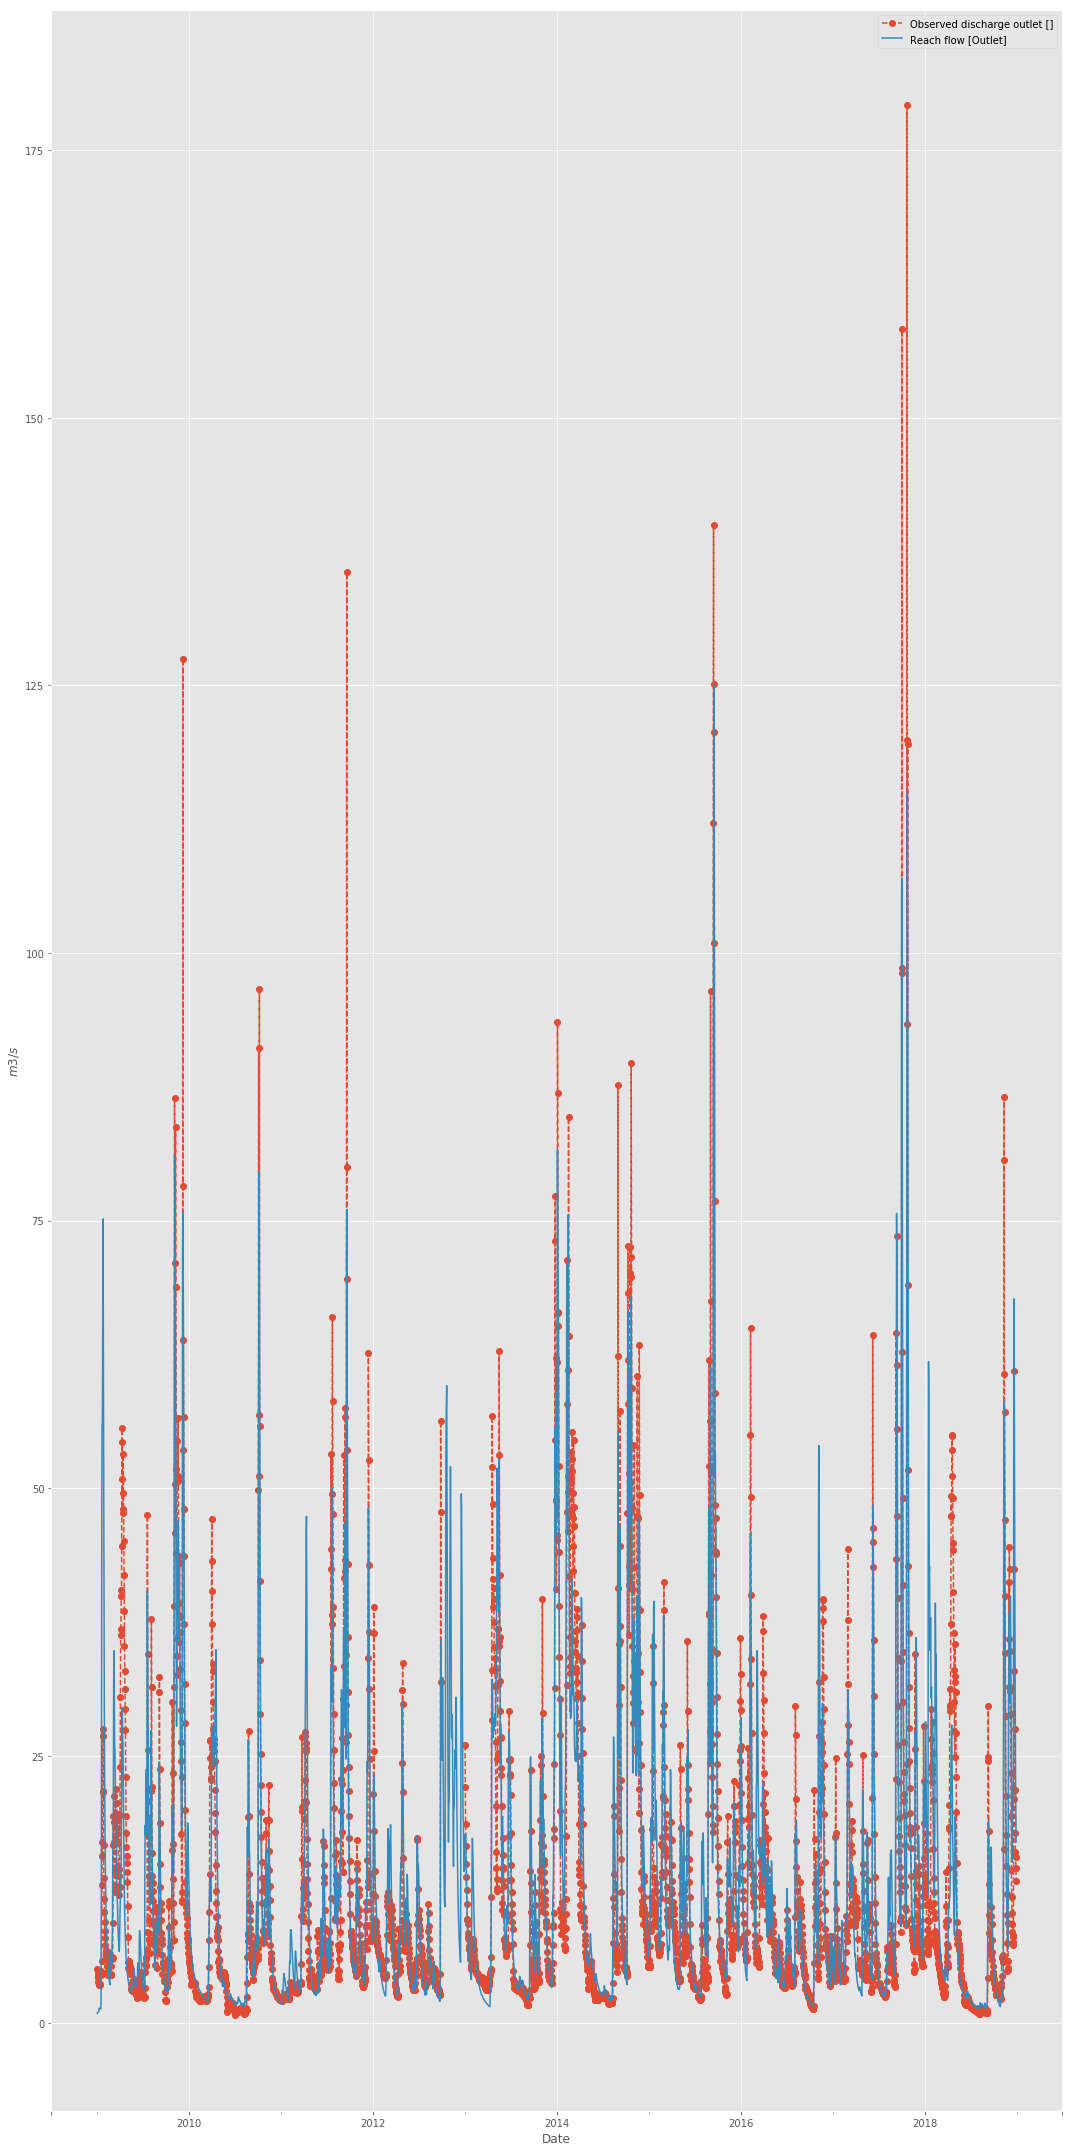

In [22]:
#par = result.params
#TODO: automate this! (we don't want to set the computed ones, but we need them to recompute based on what we set)
#par['T_melt'].set(value = mle_soln[0])
#par['DDfmelt'].set(value = mle_soln[1])
#par['DDfet'].set(value = mle_soln[2])
#par['T_s'].set(value = mle_soln[3])
#par['T_g'].set(value = mle_soln[4])
#par['a_V'].set(value = mle_soln[5])
#par['runoff_r'].set(value = mle_soln[6])
#par['runoff_s'].set(value = mle_soln[7])
#par['err_q']

#cu.set_parameter_values(par, dataset)
#dataset.run_model()
#cu.print_goodness_of_fit(dataset, comparisons)
#cu.plot_objective(dataset, comparisons)

#dataset.write_parameters_to_file('mcmc_map_params.dat')